<a href="https://colab.research.google.com/github/ChitrarthVasdev/CODSOFT/blob/main/irisflowerclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TASK 3: IRIS FLOWER CLASSIFICATION

MADE BY:CHITRARTH VASDEV

DOMAIN:DATA SCIENCE

MODEL USED: SUPPORT VECTOR CLASSIFIER(SVC)

LANGUAGE : PYTHON

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/content/IRIS.csv")
display(df)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Accuracy Score: 0.9666666666666667
Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

Confusion Matrix:

[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


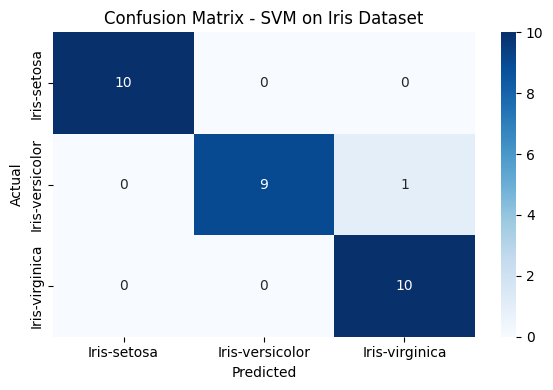

In [ ]:
# Encode target labels
label_encoder = LabelEncoder()
df["species_encoded"] = label_encoder.fit_transform(df["species"])

# Feature and target split
X = df.drop(columns=["species", "species_encoded"])
y = df["species_encoded"]

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Train SVM model
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)

# Predict
y_pred = svm_model.predict(X_test)

# Evaluation
print("Accuracy Score:", accuracy_score(y_test, y_pred))

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:\n")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix - SVM on Iris Dataset")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


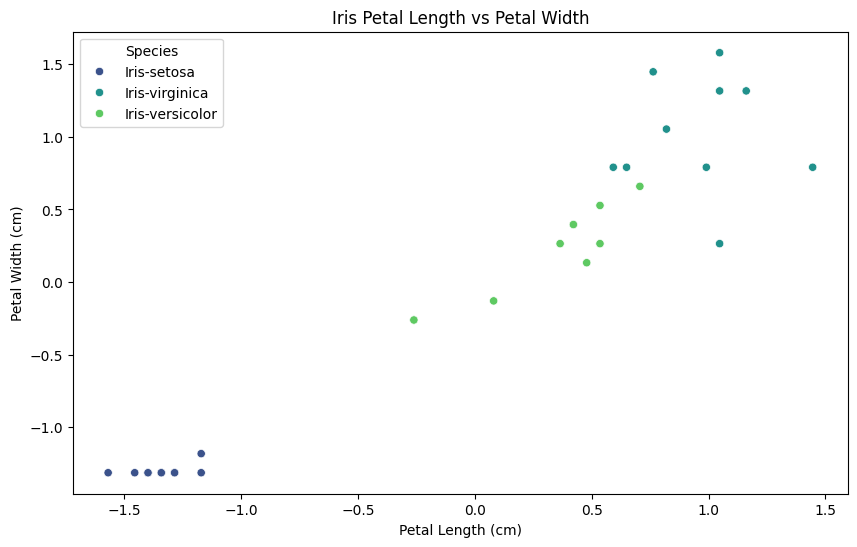

In [ ]:
# Add a new column for the original species labels to the test set for plotting
# Create a copy of X_test to avoid modifying the original DataFrame in place
X_test_plot = X_test.copy()
# Convert the numpy array to a pandas DataFrame, preserving the column names
X_test_plot = pd.DataFrame(X_test_plot, columns=X.columns)
# Now add the 'species' column using the inverse transformed labels
X_test_plot['species'] = label_encoder.inverse_transform(y_test)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=X_test_plot, x='petal_length', y='petal_width', hue='species', palette='viridis')
plt.title('Iris Petal Length vs Petal Width')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend(title='Species')
plt.show()

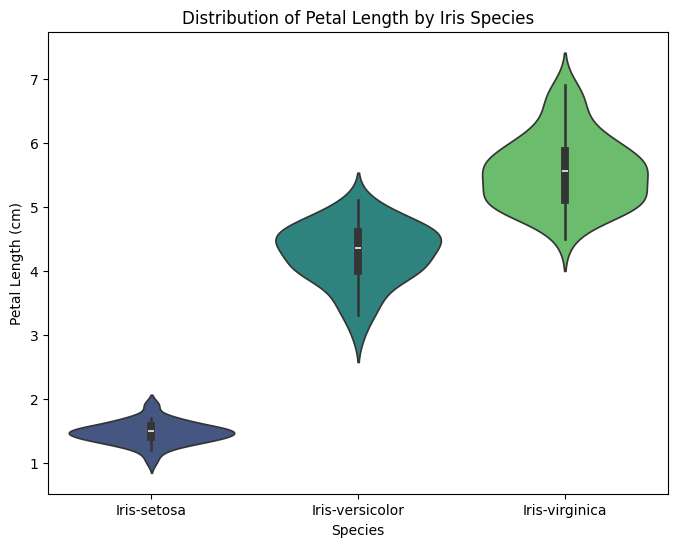

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use the original DataFrame which contains the species column
# for plotting distributions across species
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='species', y='petal_length', hue='species', palette='viridis', legend=False)
plt.title('Distribution of Petal Length by Iris Species')
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')
plt.show()